### Find S

In [3]:
import pandas as pd

data = pd.read_csv("dataset.csv")
concepts = data.iloc[:, :-1].values
target = data.iloc[:, -1].values


def find_s(concepts, target):
    hypo = concepts[0].copy()
    for i in range(1, len(concepts)):
        if target[i].lower() == "yes":
            for j in range(len(hypo)):
                if hypo[j] != concepts[i][j]:
                    hypo[j] = "?"

    return hypo


result = find_s(concepts, target)
print("Final hypothesis: ", result)

Final hypothesis:  ['Sunny' 'Warm' '?' 'Strong' '?' '?']


### Candidate Elimination

In [ ]:
import pandas as pd

data = pd.read_csv("dataset.csv")
concepts = data.iloc[:, :-1].values
target = data.iloc[:, -1].values


def candidate_elimination(concepts, target):
    s = concepts[0].copy()
    g = ["?" * len(s)]

    for i, h in enumerate(concepts):
        if target[i].lower() == "yes":
            s = ["?" if s[j] != h[j] else s[j] for j in range(len(s))]
        else:
            g = [
                gen
                for gen in g
                if all(gen[j] == "?" or gen[j] != h[j] for j in range(len(s)))
            ]

    return [s], g


print(*candidate_elimination(concepts, target), sep="\n")

[['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']]
['??????']
[['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']]
['??????']
[['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']]
['??????']
[['Sunny', 'Warm', '?', 'Strong', '?', '?']]
['??????']
[['Sunny', 'Warm', '?', 'Strong', '?', '?']]
['??????']


### Decision Tree

Accuracy:  0.9736842105263158
Confusion matrix:  [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


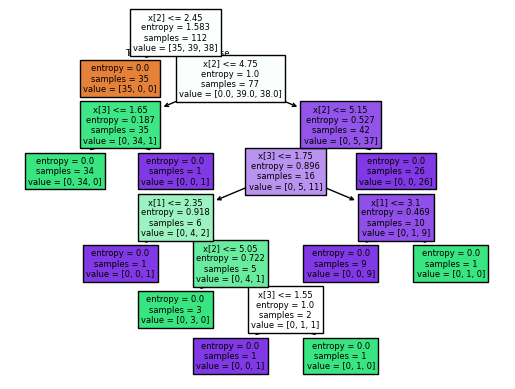

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", acc)
print("Confusion matrix: ", cm)

plot_tree(classifier, filled=True)
plt.show()

### Support Vector Machine

In [7]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  1.0


### KNN

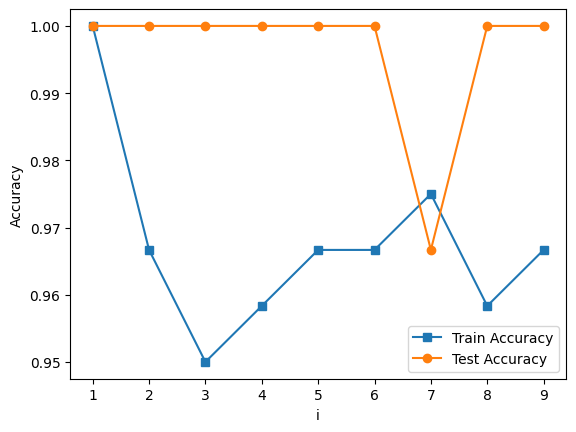

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_acc, test_acc = [], []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))


plt.plot(range(1, 10), train_acc, "s-", label="Train Accuracy")
plt.plot(range(1, 10), test_acc, "o-", label="Test Accuracy")
plt.xlabel("i")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### EM using GMM

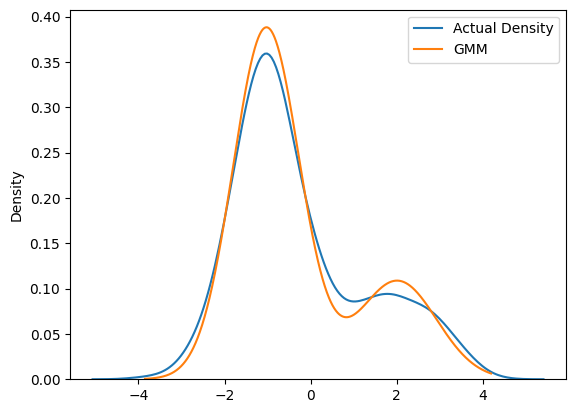

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

X1 = np.random.normal(2, 1, 200)
X2 = np.random.normal(-1, 0.8, 600)

X = np.concatenate([X1, X2]).reshape(-1, 1)

gmm = GaussianMixture(n_components=2)
gmm.fit(X)

x_grid = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
density = np.exp(gmm.score_samples(x_grid))

sns.kdeplot(X.flatten(), label="Actual Density")
plt.plot(x_grid, density, label="GMM")
plt.legend()
plt.show()


### Naive Bayes

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

df = pd.DataFrame(
    {
        "Feature1": [1, 2, 2, 1, 3, 3, 1, 2, 3, 3],
        "Feature2": ["A", "B", "B", "A", "C", "C", "A", "B", "C", "C"],
        "Class": [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
    }
)

df = pd.get_dummies(df, columns=["Feature2"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Class", axis=1), df["Class"], test_size=0.2
)

model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy: ", acc)
print("Classification report: ", cr)

Accuracy:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### K-Means

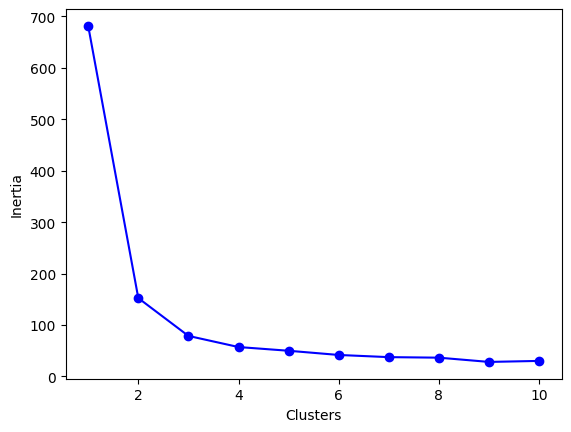

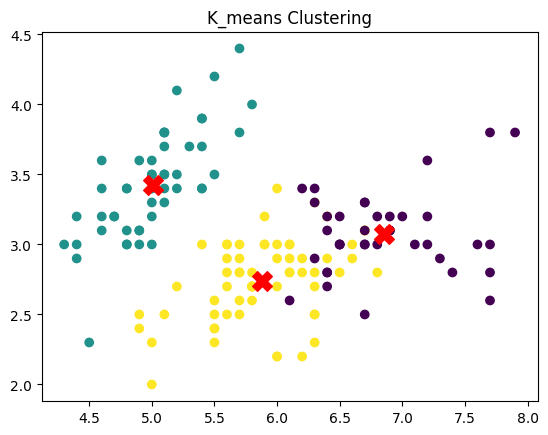

In [18]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)

inertia = [KMeans(n_clusters=i).fit(X).inertia_ for i in range(1, 11)]

plt.plot(range(1, 11), inertia, "bo-")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

k_means = KMeans(n_clusters=3)
k_means.fit(X)

centroid = k_means.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=k_means.labels_)
plt.scatter(centroid[:, 0], centroid[:, 1], c="r", s=200, marker="X")

plt.title("K_means Clustering")
plt.show()

### Apriori

In [21]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

transactions = [
    ["bread", "milk"],
    ["bread", "diaper", "beer", "egg"],
    ["milk", "diaper", "beer", "cola"],
    ["bread", "milk", "diaper", "beer"],
    ["bread", "milk", "diaper", "cola"],
]

te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent, metric="lift", min_threshold=1)

print("Frequent list: ", frequent)
print("Rules: ", rules[["antecedents", "consequents", "support", "confidence"]])

Frequent list:     support         itemsets
0      0.6           (beer)
1      0.8          (bread)
2      0.8         (diaper)
3      0.8           (milk)
4      0.6   (beer, diaper)
5      0.6  (bread, diaper)
6      0.6    (milk, bread)
7      0.6   (milk, diaper)
Rules:    antecedents consequents  support  confidence
0      (beer)    (diaper)      0.6        1.00
1    (diaper)      (beer)      0.6        0.75


### PCA

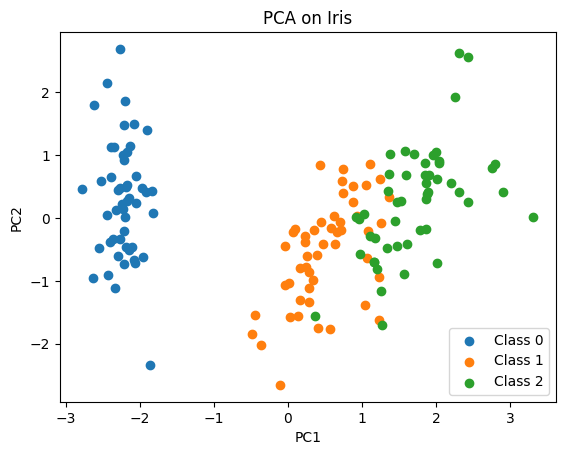

In [23]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = load_iris(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

X_pca = PCA(n_components=2).fit_transform(X_scaled)

for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"Class {label}")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris")
plt.legend()
plt.show()
